# Investigate the Iris dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I am using this workbook as practie for learning python and using Jupyter Notebooks. I will be doing basic Exploratory Data Analysis on the well known Iris dataset from the [UCI machine learning repositry](https://archive.ics.uci.edu/ml/datasets/iris). This dataset was collected by the well known statistician R.A. Fisher and published as a research paper entiled [the use of multiple measurements in taxonomic problems](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1469-1809.1936.tb02137.x). 

This dataset includes three iris flower species (*Iris setosa*, *Iris virginica*, and *Iris versicolor*) with 50 samples each as well as four features measured for each flower.

The columns in this dataset are:
    
- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

While this dataset is widely used as an introudcution for machine learning applications such as classification, I won't be doing that as part of this workbook.

**Firstly** we better load the packages we will be needed and load the dataset.

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline # Keeps the plots in the workbook

UsageError: unrecognized arguments: # Keeps the plots in the workbook


In [54]:
iris = pd.read_csv('iris.csv') 

In [55]:
iris.shape
# there are 150 data points in this dataset

(150, 6)

In [56]:
iris.dtypes
# Sepal length, sepal width, petal length and petal width are floats while species is an object

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [57]:
iris.head(5)
# Column names are
# - ID
# - Sepal.Length
# - Sepal.Width
# - Petal.Length
# - Petal.Width
# - Species

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
iris.info()
# No missing values are present, however we can confirm this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [59]:
iris.isnull().sum()
# No missing values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [60]:
# And the name of the flowers
print(sorted(iris['Species'].unique()))

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


<a id='wrangling'></a>
## Data Wrangling

Some things we might like to do are;
1. This dataset contains incorrect values. The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.
2. Add a ratio for sepal length to sepal and for petal length to petal width.


Amending incorrect data

In [63]:
iris.loc[34]
# Looking at the 35 row (python index starts at 0 so n-1 indexing)

Id                        35
SepalLengthCm            4.9
SepalWidthCm             3.1
PetalLengthCm            1.5
PetalWidthCm             0.1
Species          Iris-setosa
Name: 34, dtype: object

In [64]:
iris.at[34,'PetalWidthCm']= 0.2

In [65]:
iris.loc[34]
# We have changed petal width to 0.2 cm from 0.1 cm

Id                        35
SepalLengthCm            4.9
SepalWidthCm             3.1
PetalLengthCm            1.5
PetalWidthCm             0.2
Species          Iris-setosa
Name: 34, dtype: object

In [66]:
# Now lets change the 38th row
iris.loc[37]

Id                        38
SepalLengthCm            4.9
SepalWidthCm             3.1
PetalLengthCm            1.5
PetalWidthCm             0.1
Species          Iris-setosa
Name: 37, dtype: object

In [67]:
iris.at[37,'SepalWidthCm']= 3.6
iris.at[37,'PetalLengthCm']= 1.4

In [68]:
iris.loc[37]
# Checking the 38th row we can see our change was made correctly
# I.e. changing SepalWidthCm from 3.1 to 3.6 cm and changing PedalLengthCm from 1.5 to 1.5 cm

Id                        38
SepalLengthCm            4.9
SepalWidthCm             3.6
PetalLengthCm            1.4
PetalWidthCm             0.1
Species          Iris-setosa
Name: 37, dtype: object

Adding ratios

In [69]:
iris['PetalRatio'] = iris['PetalLengthCm'] / iris['PetalWidthCm']
iris['SepalRatio'] = iris['SepalLengthCm'] / iris['SepalWidthCm']
iris.head()
# Adding two new columns which are ratios
# these are petal ratio where petal length / petal width
# Sepal ratio where sepal length /sepal width

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,PetalRatio,SepalRatio
0,1,5.1,3.5,1.4,0.2,Iris-setosa,7.0,1.457143
1,2,4.9,3.0,1.4,0.2,Iris-setosa,7.0,1.633333
2,3,4.7,3.2,1.3,0.2,Iris-setosa,6.5,1.468750
3,4,4.6,3.1,1.5,0.2,Iris-setosa,7.5,1.483871
4,5,5.0,3.6,1.4,0.2,Iris-setosa,7.0,1.388889


<a id='eda'></a>
## Exploratory Data Analysis

As part of our EDA we will address the following
1. Summary statistics and general overview
2. Research question 1 - is there a difference in measurements (sepal length versus sepal width) between flower species?
3. Research question 2 - is there a difference in measurements (petal length versus petal width) between flower species?
4. Research question 3 - what is the link between petal ratio versus sepal ratio between flowers?
5. Research question 4 - what relationships exist between the measurements?

**1. Summary statistics and general overview**

In [91]:
iris.describe()
# While this includes all the nummerical columns, lets look at some columns in more details

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,PetalRatio,SepalRatio
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333,4.310500,1.953681
std,43.445368,0.828066,0.435866,1.765298,0.762238,2.489648,0.400480
min,1.000000,4.300000,2.000000,1.000000,0.100000,2.125000,1.268293
25%,38.250000,5.100000,2.800000,1.600000,0.300000,2.802381,1.546188
50%,75.500000,5.800000,3.000000,4.350000,1.300000,3.300000,2.032292
75%,112.750000,6.400000,3.300000,5.100000,1.800000,4.666667,2.224910
max,150.000000,7.900000,4.400000,6.900000,2.500000,15.000000,2.961538


In [84]:
iris.groupby('Species')['SepalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
Iris-versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
Iris-virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


In [85]:
iris.groupby('Species')['SepalWidthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,3.428,0.379064,2.3,3.200,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [87]:
iris.groupby('Species')['PetalLengthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
Iris-versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
Iris-virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


In [88]:
iris.groupby('Species')['PetalWidthCm'].describe()

,count,mean,std,min,25%,50%,75%,max
Species,,,,,,,,
Iris-setosa,50.0,0.246,0.105386,0.1,0.2,0.2,0.3,0.6
Iris-versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
Iris-virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


Lets look at a general summary of the data the pairplot function from seaborn

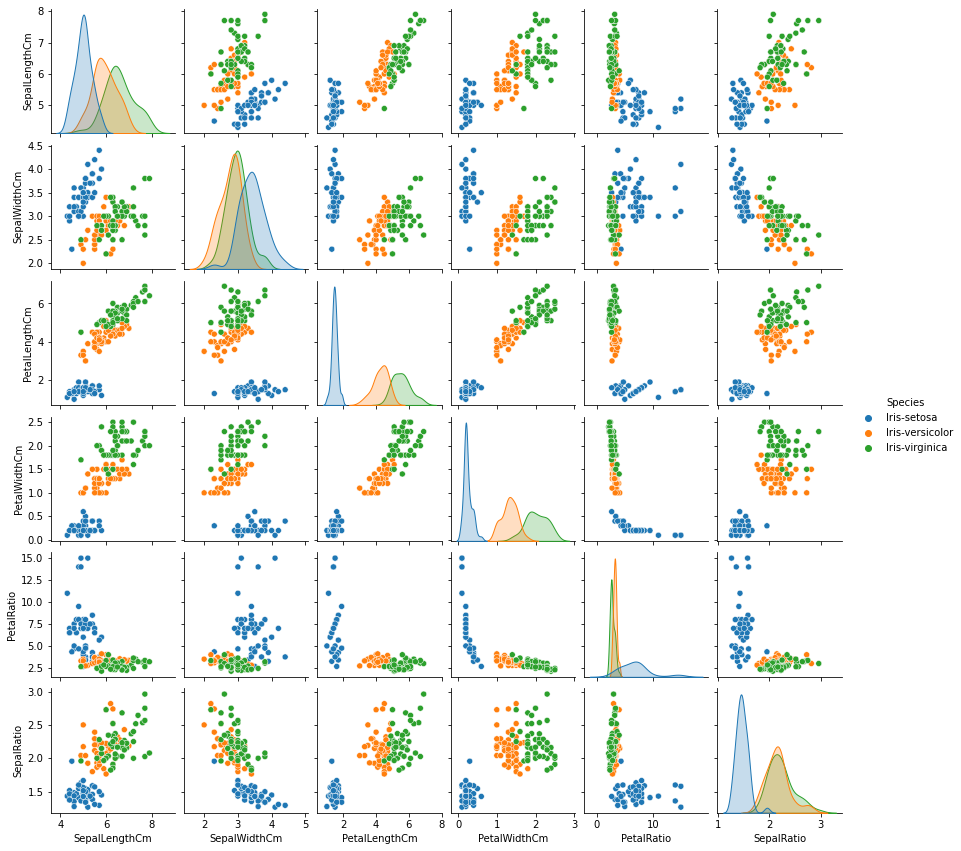

In [110]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", height=2);

This is a really interesting plot, but let's look at specific questions in a bit more detail.

**2. Research Question 1 - is there a difference in measurements (sepal length versus sepal width) between flowers?**

C:\Users\Ellen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


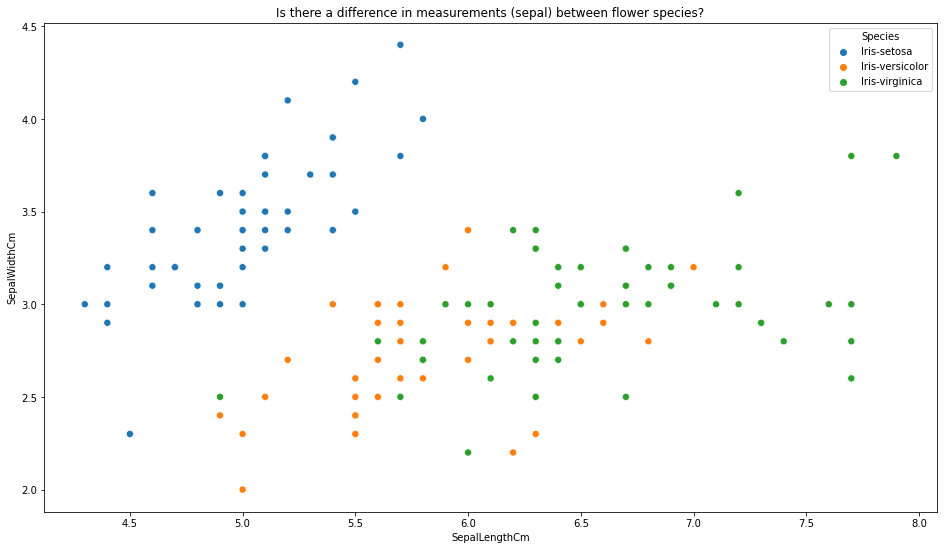

In [95]:
plt.figure(figsize=(16,9))
plt.title('Is there a difference in measurements (sepal) between flower species?')
sns.scatterplot(iris['SepalLengthCm'], iris['SepalWidthCm'], hue = iris['Species'], s= 50);

We can see that while *Iris setosa* is separated from the two other flow species, data points for both *Iris versicolor* and *Iris virginica* overlap.

Let's look at this using boxplots.

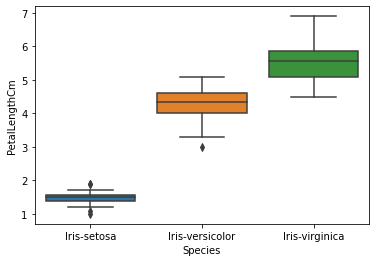

In [97]:
sns.boxplot(x="Species", y="SepalLengthCm", data=iris);

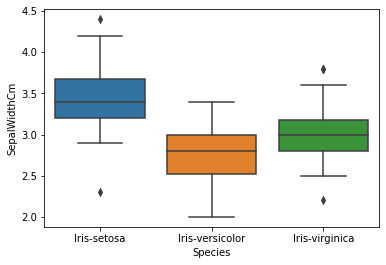

In [98]:
sns.boxplot(x="Species", y="SepalWidthCm", data=iris);

We can see that for *Iris setosa*, the values do not overlap with the two other speices. In comparsion, similar values exist for sepal width.

**3. Research question 2 - is there a difference in measurements (petal length versus petal width) between flower species?**

C:\Users\Ellen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


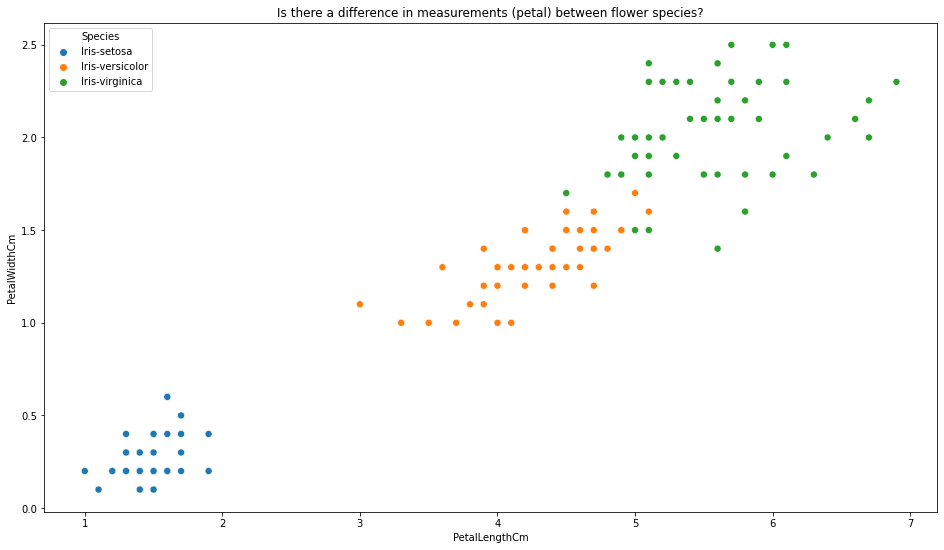

In [104]:
plt.figure(figsize=(16,9))
plt.title('Is there a difference in measurements (petal) between flower species?')
sns.scatterplot(iris['PetalLengthCm'], iris['PetalWidthCm'], hue = iris['Species'], s= 50);

For pedal width and legnth, we can see that while *Iris setosa* is separated from the two other flow species, data points for both *Iris versicolor* and *Iris virginica* overlap.

Let's look at this using boxplots.

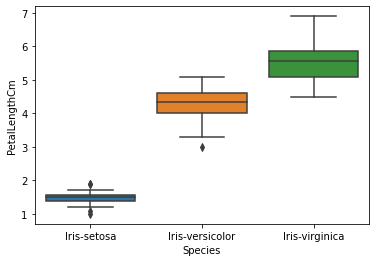

In [100]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris);

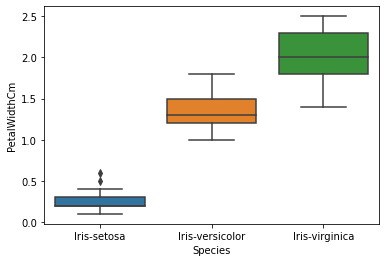

In [101]:
sns.boxplot(x="Species", y="PetalWidthCm", data=iris);

We can see that for *Iris setosa*, the values do not overlap with the two other speices for petal length. However, unlike for the width of sepals, we can see here that the values for pedal width of *Iris setosa* does not overlap with the two other flower species..

**4. Research question 3 - what is the link between petal ratio versus sepal ratio between flowers?**

C:\Users\Ellen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


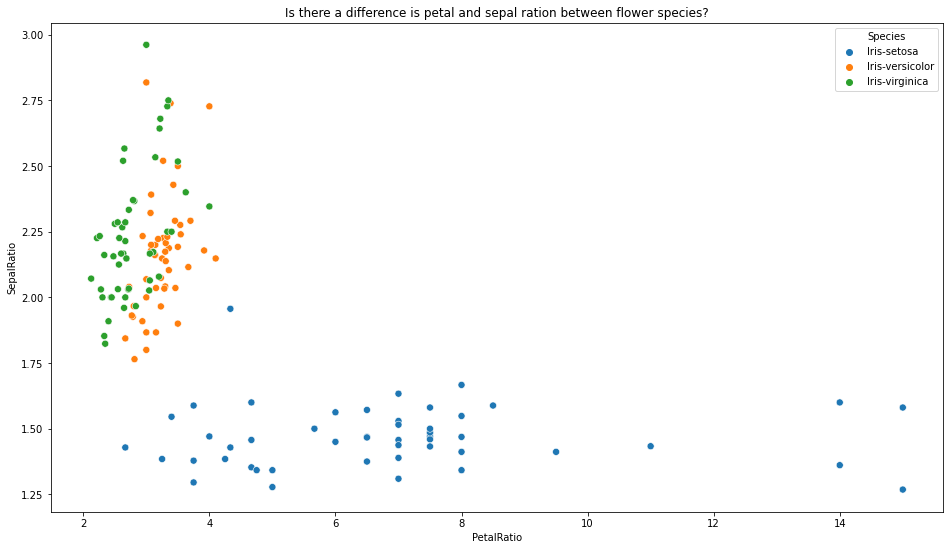

In [103]:
plt.figure(figsize=(16,9))
plt.title('Is there a difference is petal and sepal ration between flower species?')
sns.scatterplot(iris['PetalRatio'], iris['SepalRatio'], hue = iris['Species'], s= 50);

These ratios may be useful for further use with a classification algorithm.

**5. Research question 4 - what relationships exist between the measurements?**

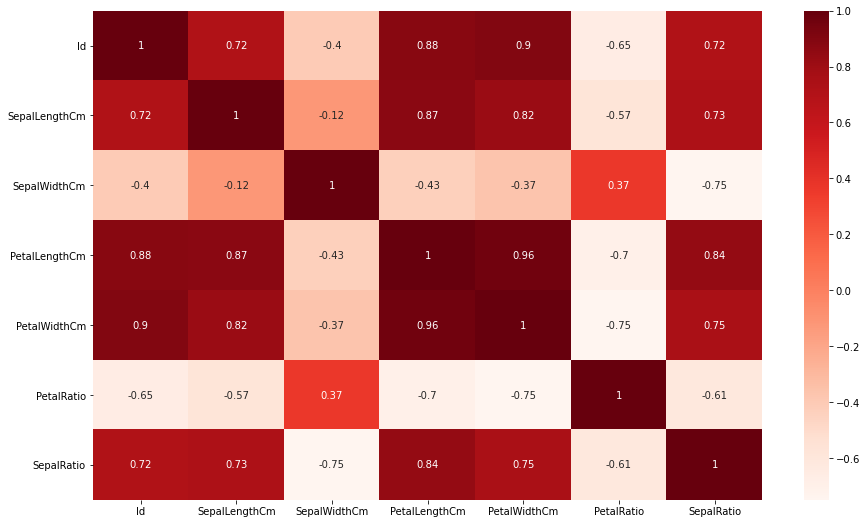

In [114]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(iris.corr(), cmap='Reds', annot = True);

We have plotted the correlations as a heat map of the iris dataset. I really like the visual appeal of a heatmap and the amount of information it can tell. For example we can see there is a strong negative relationship between Petal ratio and petal width (-0.76). 

For intrepretation of correlation coefficients the following classifications exist: weak (0 to 0.3 and 0 to -0.3), moderate (0.3 to 0.7 and -0.3 to -0.7), and strong (0.7 to 1.0 and -0.7 and -1.0). Further information about correlation coefficients can be seen in this following [paper](https://link.springer.com/article/10.1057/jt.2009.5)

Finally, better save the changes to the data made

In [120]:
iris.to_csv('iris_corrected.csv')

<a id='conclusions'></a>
## Conclusions

From this Jupyter Workbook we can see why this dataset is used a lot for training. From the observations above we can see that *Iris setosa* is separated from the other two flower species. The next step would be to classify flowers based on a machine learning technique. If we had done logistic regression we may need to remove some variables as we would have multicollinearity as variables are correlated (from the heatmap).